In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import matplotlib.pyplot as plt
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.wrappers import scikit_learn
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import metrics
import tensorflow
from keras.layers import Dense, Dropout, Flatten
from keras import layers
from keras import models
from keras import optimizers
import matplotlib.pyplot as plt
%matplotlib inline 
from PIL import Image, ImageOps

In [2]:
import os
base_dir='../data/chest_xray/'
train_pneumonia=os.listdir('../data/chest_xray/train/PNEUMONIA/')

train_normal=os.listdir('../data/chest_xray/train/NORMAL/')

val_dir_normal=os.listdir('../data/chest_xray/val/NORMAL/')

test_dir_normal=os.listdir('../data/chest_xray/test/NORMAL/')

val_dir_pneumonia=os.listdir('../data/chest_xray/val/PNEUMONIA/')

test_dir_pneumonia=os.listdir('../data/chest_xray/test/PNEUMONIA/')


In [3]:
print("Train set w/ pneumonia: ", len(train_pneumonia))
print("Train set normal: ", len(train_normal))
print("Validation set w/ pneumonia: ", len(val_dir_pneumonia))
print("Validation set normal: ", len(val_dir_normal))
print("Test set w/ pneumonia: ", len(test_dir_pneumonia))
print("Test set normal: ", len(test_dir_normal))


Train set w/ pneumonia:  2144
Train set normal:  699
Validation set w/ pneumonia:  1740
Validation set normal:  650
Test set w/ pneumonia:  390
Test set normal:  234


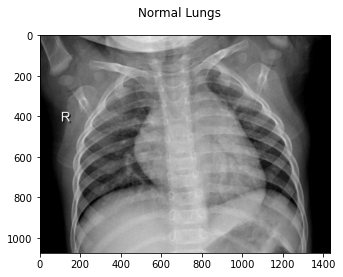

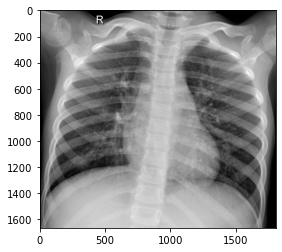

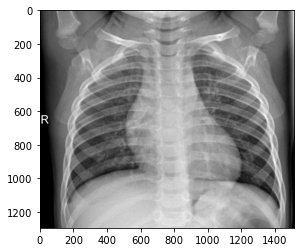

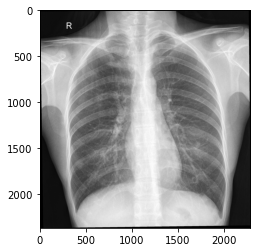

In [188]:
from keras.preprocessing.image import ImageDataGenerator, load_img
plt.suptitle('Normal Lungs')
for i in range(0,4):
    img = train_normal[i]
    img = load_img('../data/chest_xray/train/NORMAL/' + img)
    plt.imshow(img)
    plt.show()

In [43]:
def mirror_img(path_from, path_to, img_list):
    """Take a path to where images are located, a path to save transformed images 
    and the list of images to transform. Takes each image and returns the mirrored version of that image 
    with a new name marking its mirrored status"""
    for im in range(0, len(img_list)):
        full = img_list[im]
        print(full)
        split = img_list[im]. split('.')
        print(split)
        img = Image.open(path_from + full)
        img_mirror = ImageOps.mirror(img)
        img_mirror.save(path_to + split[0] + '_mirror' + '.jpeg', quality=95)

In [99]:
normal_img_arrays = []

for i in range(len(train_normal)):
    img = train_normal[i]
    img = load_img('../data/chest_xray/train/NORMAL/' + img)
    array = np.array(img)[:,:,0]
    normal_img_arrays.append(array)

In [100]:
normal_img_arrays[3].shape

(2363, 2288)

In [101]:

pneumonia_img_arrays = []

for i in range(len(train_pneumonia)):
    img = train_pneumonia[i]
    img = load_img('../data/chest_xray/train/PNEUMONIA/' + img)
    array = np.array(img)[:,:,0]
    pneumonia_img_arrays.append(array)

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('../data/chest_xray/train/',
                                                 target_size=(224, 224),
                                                 shuffle=True,
                                                 batch_size=50,
                                                 class_mode='binary')

val_set = train_datagen.flow_from_directory('../data/chest_xray/val/',
                                            target_size=(224, 224),
                                            shuffle=True,
                                            batch_size=50,
                                            class_mode='binary')

test_set = test_datagen.flow_from_directory('../data/chest_xray/test/',
                                            target_size=(224, 224),
                                            shuffle=True,
                                            batch_size=10,
                                            class_mode='binary')

Found 2843 images belonging to 2 classes.
Found 2390 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [192]:
model = Sequential()
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['categorical_accuracy'])
model.add(Flatten())
history = model.fit_generator(training_set,
                    epochs=10,
                    validation_data=val_set)

## RMSprop(lr=1e-4) model

In [198]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [200]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

In [201]:
history = model.fit(training_set, 
                              steps_per_epoch=10, 
                              epochs=5, 
                              validation_data=val_set, 
                              validation_steps=5)

Epoch 1/5
10/10 [==============================] - 20s 2s/step - loss: 3.9131 - acc: 0.5800 - val_loss: 0.5675 - val_acc: 0.6800
Epoch 2/5
10/10 [==============================] - 17s 2s/step - loss: 0.8884 - acc: 0.6920 - val_loss: 0.5666 - val_acc: 0.7440
Epoch 3/5
10/10 [==============================] - 18s 2s/step - loss: 1.0161 - acc: 0.7260 - val_loss: 0.7118 - val_acc: 0.7160
Epoch 4/5
10/10 [==============================] - 17s 2s/step - loss: 0.8938 - acc: 0.6820 - val_loss: 0.8206 - val_acc: 0.5360
Epoch 5/5
10/10 [==============================] - 18s 2s/step - loss: 0.5047 - acc: 0.8060 - val_loss: 0.3242 - val_acc: 0.8480


## adam Model

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tensorflow.keras.metrics.Recall()])


history = model.fit(training_set, 
                              steps_per_epoch=10, 
                              epochs=5, 
                              validation_data=val_set, 
                              validation_steps=5)



Epoch 1/5
10/10 [==============================] - 12s 1s/step - loss: 15.2432 - accuracy: 0.6320 - recall_1: 0.7128 - val_loss: 8.6410 - val_accuracy: 0.7520 - val_recall_1: 1.0000
Epoch 2/5
10/10 [==============================] - 13s 1s/step - loss: 2.9322 - accuracy: 0.7340 - recall_1: 0.8238 - val_loss: 1.4761 - val_accuracy: 0.7440 - val_recall_1: 1.0000
Epoch 3/5
10/10 [==============================] - 14s 1s/step - loss: 0.3822 - accuracy: 0.8824 - recall_1: 0.9553 - val_loss: 0.4543 - val_accuracy: 0.8080 - val_recall_1: 0.8613
Epoch 4/5
10/10 [==============================] - 15s 1s/step - loss: 0.1470 - accuracy: 0.9560 - recall_1: 0.9698 - val_loss: 0.3667 - val_accuracy: 0.8640 - val_recall_1: 0.9045
Epoch 5/5
10/10 [==============================] - 15s 2s/step - loss: 0.1787 - accuracy: 0.9360 - recall_1: 0.9549 - val_loss: 0.3624 - val_accuracy: 0.8400 - val_recall_1: 0.9775


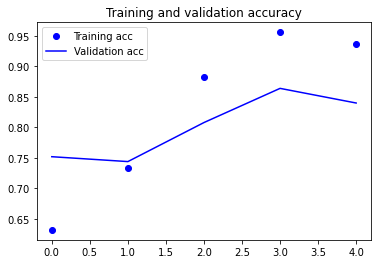

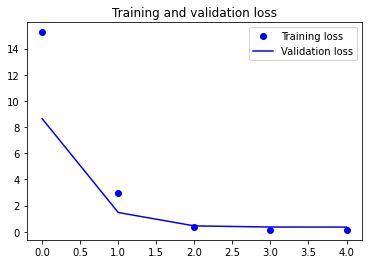

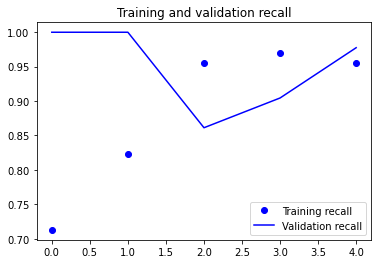

<Figure size 432x288 with 0 Axes>

In [32]:
loss_acc_rec_plotter(history)


In [31]:
def loss_acc_rec_plotter(history):
    """Takes the History object returned from model, pulls out relevant values and plot the training
    against validation for loss, accuracy and recall"""
    
    key_list = list(history.history.keys())
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    rec = history.history[key_list[2]]
    val_rec = history.history[key_list[5]]

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

    plt.plot(epochs, rec, 'bo', label='Training recall')
    plt.plot(epochs, val_rec, 'b', label='Validation recall')
    plt.title('Training and validation recall')
    plt.legend()
    plt.figure()

## Adam model 2, 2nd layer

In [172]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tensorflow.keras.metrics.Recall()])


history = model.fit(training_set, 
                              steps_per_epoch=10, 
                              epochs=5, 
                              validation_data=val_set, 
                              validation_steps=5)

Epoch 1/5
10/10 [==============================] - 17s 2s/step - loss: 5.7690 - accuracy: 0.6120 - recall_7: 0.7053 - val_loss: 0.5855 - val_accuracy: 0.7120 - val_recall_7: 1.0000
Epoch 2/5
10/10 [==============================] - 17s 2s/step - loss: 0.4345 - accuracy: 0.8140 - recall_7: 0.9434 - val_loss: 0.3835 - val_accuracy: 0.8200 - val_recall_7: 0.8571
Epoch 3/5
10/10 [==============================] - 16s 2s/step - loss: 0.2594 - accuracy: 0.8940 - recall_7: 0.9372 - val_loss: 0.3611 - val_accuracy: 0.8240 - val_recall_7: 0.9167
Epoch 4/5
10/10 [==============================] - 16s 2s/step - loss: 0.1793 - accuracy: 0.9320 - recall_7: 0.9474 - val_loss: 0.2808 - val_accuracy: 0.8600 - val_recall_7: 0.8883
Epoch 5/5
10/10 [==============================] - 17s 2s/step - loss: 0.1393 - accuracy: 0.9460 - recall_7: 0.9652 - val_loss: 0.2139 - val_accuracy: 0.9120 - val_recall_7: 0.9714


## adam model 3, model.fit rework, 12, 8, 8

In [174]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tensorflow.keras.metrics.Recall()])


history = model.fit(training_set, 
                              steps_per_epoch=12, 
                              epochs=8, 
                              validation_data=val_set, 
                              validation_steps=8)

Epoch 1/8
12/12 [==============================] - 20s 2s/step - loss: 4.5024 - accuracy: 0.6833 - recall_8: 0.7763 - val_loss: 0.4663 - val_accuracy: 0.7575 - val_recall_8: 0.9519
Epoch 2/8
12/12 [==============================] - 20s 2s/step - loss: 0.3939 - accuracy: 0.8128 - recall_8: 0.9095 - val_loss: 0.5016 - val_accuracy: 0.7750 - val_recall_8: 0.9375
Epoch 3/8
12/12 [==============================] - 21s 2s/step - loss: 0.2256 - accuracy: 0.9050 - recall_8: 0.9425 - val_loss: 0.2905 - val_accuracy: 0.8775 - val_recall_8: 0.9007
Epoch 4/8
12/12 [==============================] - 22s 2s/step - loss: 0.1459 - accuracy: 0.9517 - recall_8: 0.9610 - val_loss: 0.3160 - val_accuracy: 0.8675 - val_recall_8: 0.9733
Epoch 5/8
12/12 [==============================] - 22s 2s/step - loss: 0.1557 - accuracy: 0.9494 - recall_8: 0.9686 - val_loss: 0.1515 - val_accuracy: 0.9325 - val_recall_8: 0.9507
Epoch 6/8
12/12 [==============================] - 23s 2s/step - loss: 0.1316 - accuracy: 0.943

## adam model 4, model.fit rework, 15, 10, 10

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tensorflow.keras.metrics.Recall()])


history = model.fit(training_set, 
                              steps_per_epoch=15, 
                              epochs=10, 
                              validation_data=val_set, 
                              validation_steps=10)

Epoch 1/10
15/15 [==============================] - 23s 2s/step - loss: 5.3637 - accuracy: 0.6667 - recall: 0.7776 - val_loss: 0.4873 - val_accuracy: 0.7220 - val_recall: 0.9709
Epoch 2/10
15/15 [==============================] - 23s 2s/step - loss: 0.2858 - accuracy: 0.8880 - recall: 0.9458 - val_loss: 0.2921 - val_accuracy: 0.8720 - val_recall: 0.9194
Epoch 3/10
15/15 [==============================] - 23s 2s/step - loss: 0.1699 - accuracy: 0.9394 - recall: 0.9558 - val_loss: 0.3315 - val_accuracy: 0.8720 - val_recall: 0.9756
Epoch 4/10
15/15 [==============================] - 23s 2s/step - loss: 0.1338 - accuracy: 0.9493 - recall: 0.9628 - val_loss: 0.2196 - val_accuracy: 0.9140 - val_recall: 0.9804
Epoch 5/10
15/15 [==============================] - 24s 2s/step - loss: 0.0860 - accuracy: 0.9690 - recall: 0.9804 - val_loss: 0.1360 - val_accuracy: 0.9540 - val_recall: 0.9737
Epoch 6/10
15/15 [==============================] - 23s 2s/step - loss: 0.0737 - accuracy: 0.9758 - recall: 0.

## SGD Model

In [179]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy', tensorflow.keras.metrics.Recall()])


history = model.fit(training_set, 
                              steps_per_epoch=10, 
                              epochs=5, 
                              validation_data=test_set, 
                              validation_steps=5)

Epoch 1/5
10/10 [==============================] - 12s 1s/step - loss: 0.8836 - accuracy: 0.6917 - recall_10: 0.8922 - val_loss: 0.7620 - val_accuracy: 0.5600 - val_recall_10: 1.0000
Epoch 2/5
10/10 [==============================] - 11s 1s/step - loss: 0.5258 - accuracy: 0.7700 - recall_10: 1.0000 - val_loss: 0.7151 - val_accuracy: 0.6400 - val_recall_10: 1.0000
Epoch 3/5
10/10 [==============================] - 11s 1s/step - loss: 0.5120 - accuracy: 0.7600 - recall_10: 1.0000 - val_loss: 0.5973 - val_accuracy: 0.6200 - val_recall_10: 1.0000
Epoch 4/5
10/10 [==============================] - 12s 1s/step - loss: 0.4619 - accuracy: 0.7860 - recall_10: 0.9680 - val_loss: 0.7070 - val_accuracy: 0.7000 - val_recall_10: 1.0000
Epoch 5/5
10/10 [==============================] - 12s 1s/step - loss: 0.4228 - accuracy: 0.8340 - recall_10: 0.9946 - val_loss: 0.5063 - val_accuracy: 0.8200 - val_recall_10: 1.0000


## SGD model 2 more layers

In [182]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy',tensorflow.keras.metrics.Recall()])


history = model.fit(training_set, 
                              steps_per_epoch=10, 
                              epochs=5, 
                              validation_data=test_set, 
                              validation_steps=5)

Epoch 1/5
10/10 [==============================] - 14s 1s/step - loss: 0.5515 - accuracy: 0.7860 - recall_11: 1.0000 - val_loss: 0.7760 - val_accuracy: 0.6600 - val_recall_11: 1.0000
Epoch 2/5
10/10 [==============================] - 13s 1s/step - loss: 0.5698 - accuracy: 0.6755 - recall_11: 0.8944 - val_loss: 0.6533 - val_accuracy: 0.6000 - val_recall_11: 1.0000
Epoch 3/5
10/10 [==============================] - 13s 1s/step - loss: 0.4719 - accuracy: 0.7880 - recall_11: 1.0000 - val_loss: 0.6864 - val_accuracy: 0.6000 - val_recall_11: 1.0000
Epoch 4/5
10/10 [==============================] - 14s 1s/step - loss: 0.4977 - accuracy: 0.7840 - recall_11: 0.9605 - val_loss: 0.6175 - val_accuracy: 0.6600 - val_recall_11: 1.0000
Epoch 5/5
10/10 [==============================] - 14s 1s/step - loss: 0.4332 - accuracy: 0.8100 - recall_11: 0.9738 - val_loss: 1.0418 - val_accuracy: 0.6000 - val_recall_11: 1.0000
